In [1]:
# Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Sales_Data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
df['month'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M').dt.month

In [3]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
# Describe the dataset
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


**Data Cleaning**

In [5]:
# Shape and size of the dataset
df.shape

(186850, 6)

In [23]:
# Drop rows where any column has a NaN value
df.dropna(how="any", inplace=True)

In [24]:
df.columns.to_list()

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address',
 'Month']

In [26]:
# Ensure 'Order Date' is in datetime format for accurate month extraction
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

# Extract the month in a new 'Month' column
df['Month'] = df['Order Date'].dt.month.astype(int)

In [30]:
# Extract the city and state by splitting the address string
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split()[0])

**Data Exploration**

In [37]:
#Distribution of Product Sales
# Count the number of orders for each product
product_sales = df['Product'].value_counts()
print(product_sales)

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64


In [40]:
#Total Revenue by Product
# Create a revenue column
df['Revenue'] = df['Quantity Ordered'].astype(float) * df['Price Each'].astype(float)

# Group by product and calculate total revenue
product_revenue = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)

print(product_revenue)

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Revenue, dtype: float64


In [42]:
#Sales by City
# Total sales by city (in terms of orders)
city_sales = df['City'].value_counts()

# Total revenue by city
city_revenue = df.groupby('City')['Revenue'].sum().sort_values(ascending=False)

print(f"Total sales by city ----------------->{city_sales}")
print(f"Total revenue by city ------------------->{city_revenue}")

Total sales by city ----------------->City
San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: count, dtype: int64
Total revenue by city ------------------->City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Revenue, dtype: float64


In [43]:
#Monthly Sales Trends
# Assuming 'Month' column is already available
monthly_sales = df.groupby('Month')['Revenue'].sum()

print(monthly_sales)

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Revenue, dtype: float64


In [44]:
#Time Analysis: Best Time to Advertise
# Extract the hour from the 'Order Date'
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour

# Count orders by hour
orders_by_hour = df.groupby('Hour').size()

print(orders_by_hour)

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
dtype: int64


**Data Visualization**

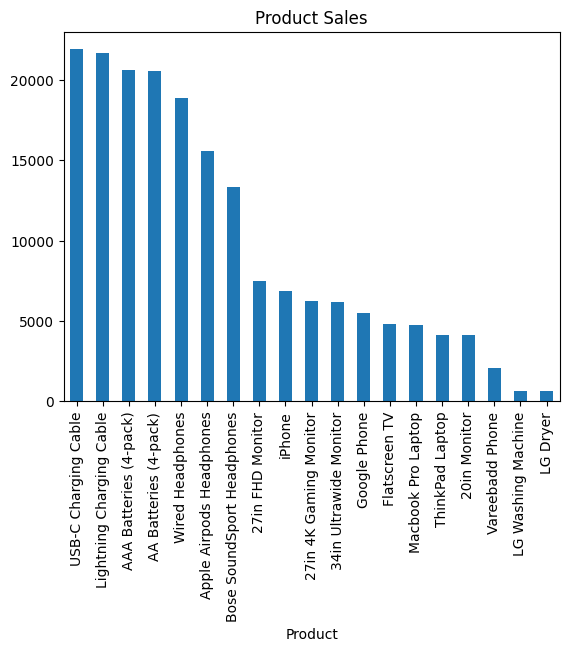

In [46]:
# Plot product sales
df['Product'].value_counts().plot(kind='bar', title='Product Sales')
plt.show()

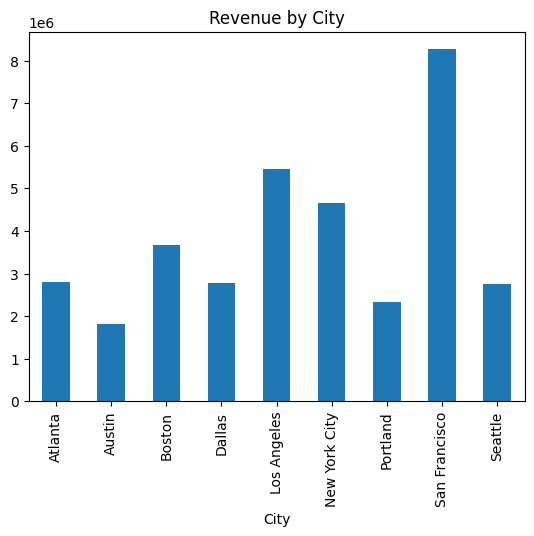

In [47]:
# Plot city revenue
df.groupby('City')['Revenue'].sum().plot(kind='bar', title='Revenue by City')
plt.show()

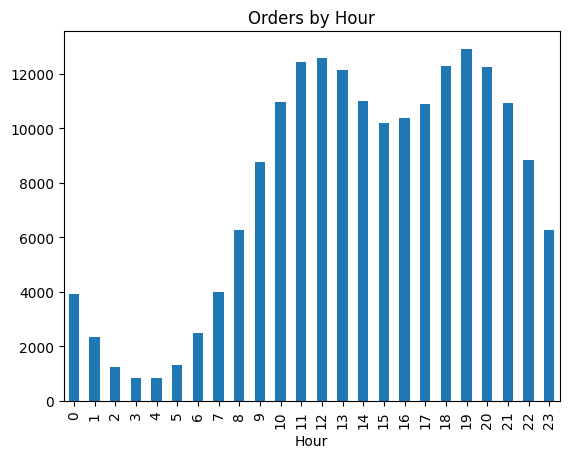

In [48]:
# Plot orders by hour
orders_by_hour.plot(kind='bar', title='Orders by Hour')
plt.show()

In [50]:
# What products are most often sold together?
# Group by 'Order ID' and aggregate products into lists
orders = df.groupby('Order ID')['Product'].apply(list).tolist()

In [51]:
from itertools import combinations
from collections import Counter
# Function to get pairs of products from a list
def get_pairs(products):
    return [tuple(sorted(pair)) for pair in combinations(products, 2)]

# Get all pairs of products for each order
pairs = []
for order in orders:
    pairs.extend(get_pairs(order))

# Count occurrences of each pair
pair_counts = Counter(pairs)

# Convert to DataFrame for better readability
pair_df = pd.DataFrame(pair_counts.items(), columns=['Product Pair', 'Count']).sort_values(by='Count', ascending=False)

print(pair_df)

                                     Product Pair  Count
11             (Lightning Charging Cable, iPhone)   1015
3            (Google Phone, USB-C Charging Cable)    999
7                      (Wired Headphones, iPhone)    462
17               (Google Phone, Wired Headphones)    423
5              (Apple Airpods Headphones, iPhone)    373
..                                            ...    ...
163        (27in FHD Monitor, LG Washing Machine)      1
161                  (LG Dryer, Wired Headphones)      1
142                      (Google Phone, LG Dryer)      1
158  (34in Ultrawide Monitor, LG Washing Machine)      1
87             (Google Phone, LG Washing Machine)      1

[175 rows x 2 columns]


In [57]:
#What product sold the most? Why do you think it sold the most?
# Calculate total quantity ordered for each product
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce').astype(int)
product_sales = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

# Display the product with the highest total sales
most_sold_product = product_sales.idxmax()
most_sold_quantity = product_sales.max()

print(f"Most sold product: {most_sold_product}")
print(f"Total quantity sold: {most_sold_quantity}")

Most sold product: AAA Batteries (4-pack)
Total quantity sold: 31017


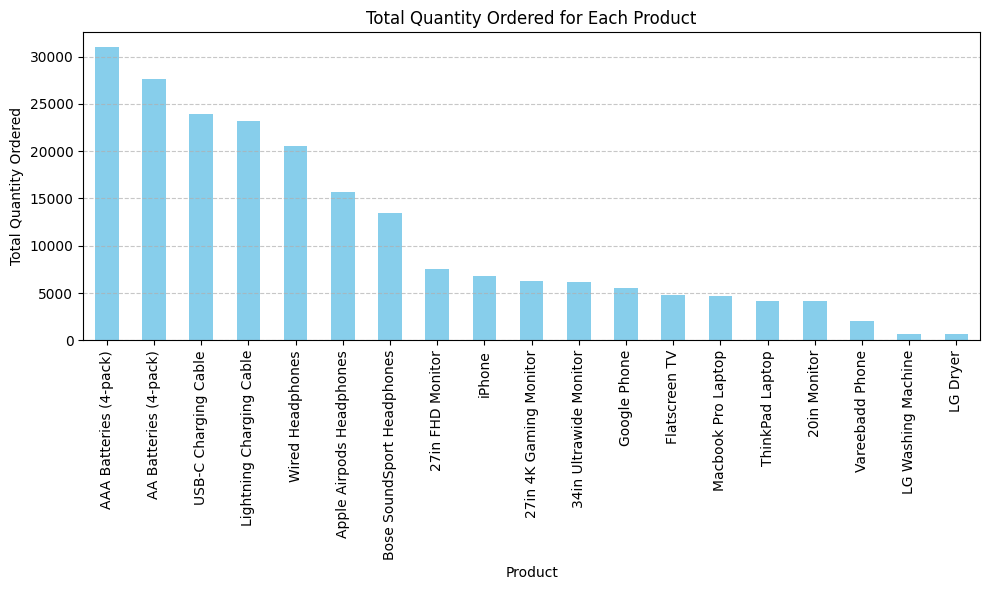

In [58]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Total Quantity Ordered for Each Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()